In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("C:/Users/dines/OneDrive/Desktop/project files/e commerce funnel project datasets.csv") 
data.head()

 





,user_id,website_visit,product_view,add_to_cart,checkout,purchase,customer_type,marketing_channel
0,aaa1,1,1,0,0,0,New,Organic Search
1,aab2,1,1,1,0,0,Returning,Paid Ads
2,aac3,1,1,1,1,0,Returning,Email
3,aad4,1,1,1,0,0,New,Organic Search
4,aae5,1,0,0,0,0,New,Email


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            2500 non-null   object
 1   website_visit      2500 non-null   int64 
 2   product_view       2500 non-null   int64 
 3   add_to_cart        2500 non-null   int64 
 4   checkout           2500 non-null   int64 
 5   purchase           2500 non-null   int64 
 6   customer_type      2500 non-null   object
 7   marketing_channel  2500 non-null   object
dtypes: int64(5), object(3)
memory usage: 156.4+ KB


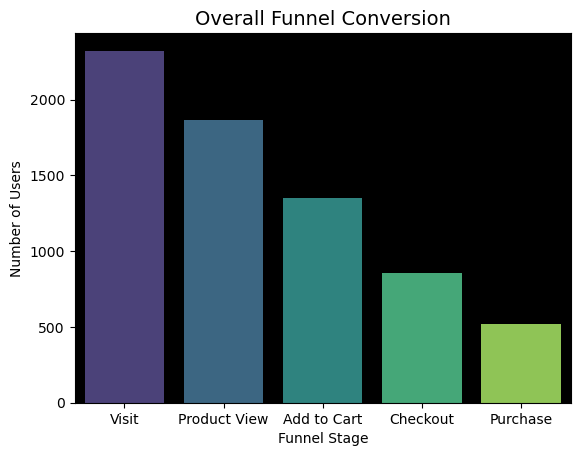

In [5]:
# Funnel counts
funnel_counts = [
    data["website_visit"].sum(),
    data["product_view"].sum(),
    data["add_to_cart"].sum(),
    data["checkout"].sum(),
    data["purchase"].sum()
]
stages = ["Visit", "Product View", "Add to Cart", "Checkout", "Purchase"]
#background & plots
ax = sns.barplot(x=stages, y=funnel_counts,hue=stages,dodge=False, palette="viridis")
ax.set_facecolor("black")
plt.title("Overall Funnel Conversion", color="black", fontsize=14)
plt.ylabel("Number of Users", color="black")
plt.xlabel("Funnel Stage", color="black")
plt.show()




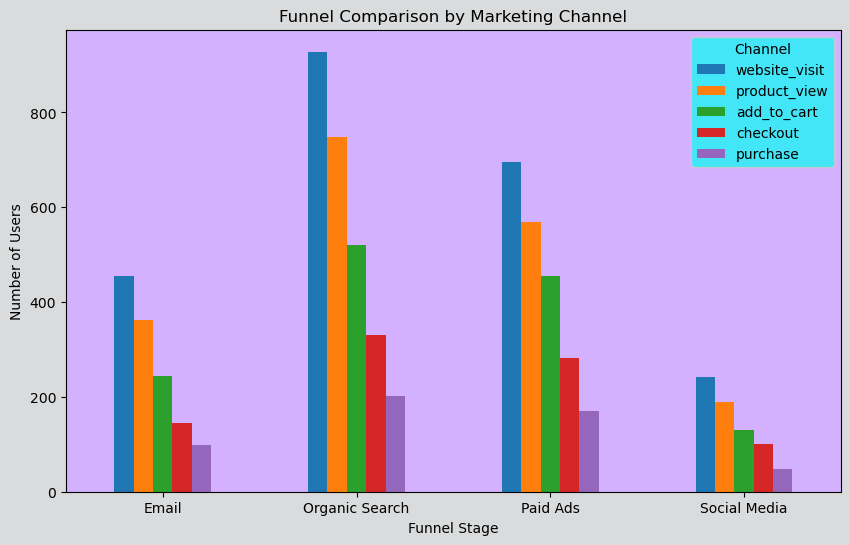

In [38]:
import matplotlib.pyplot as plt

# Group by marketing channel
funnel_by_channel = data.groupby("marketing_channel")[["website_visit","product_view","add_to_cart","checkout","purchase"]].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#DADBDC")   # Light gray (cement color)
ax.set_facecolor("#D3B1FE")          # Slightly lighter gray for axes

funnel_by_channel.plot(kind="bar", ax=ax)

ax.set_title("Funnel Comparison by Marketing Channel", color='black')
ax.set_xlabel("Funnel Stage", color='black')
ax.set_ylabel("Number of Users", color='black')

ax.tick_params(colors='black')
ax.legend(title="Channel", facecolor="#1FF4F4", labelcolor='black')
plt.xticks(rotation=0)


plt.show()


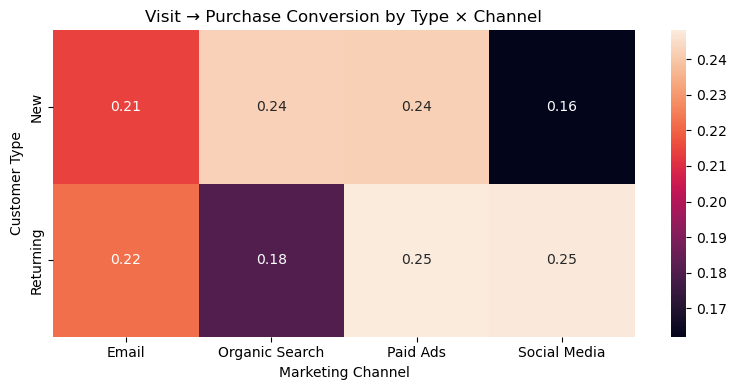

In [7]:
import seaborn as sns
stages = ["website_visit","purchase"]

g = (data.groupby(["customer_type","marketing_channel"])[stages]
       .sum()
       .assign(conv=lambda x: x["purchase"]/x["website_visit"])
       .reset_index())

pivot = g.pivot(index="customer_type", columns="marketing_channel", values="conv").fillna(0)

plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("Visit → Purchase Conversion by Type × Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Customer Type")
plt.tight_layout()
plt.show()


In [37]:
from plotly import graph_objects as go

# group by customer_type
funnel_by_customer = data.groupby("customer_type")[["website_visit","product_view","add_to_cart","checkout","purchase"]].sum().T

fig = go.Figure()

for cust in funnel_by_customer.columns:
    fig.add_trace(go.Funnel(
        name=cust,
        y=funnel_by_customer.index,
        x=funnel_by_customer[cust]
    ))

fig.update_layout(title="Funnel Chart by Customer Type")
fig.show()


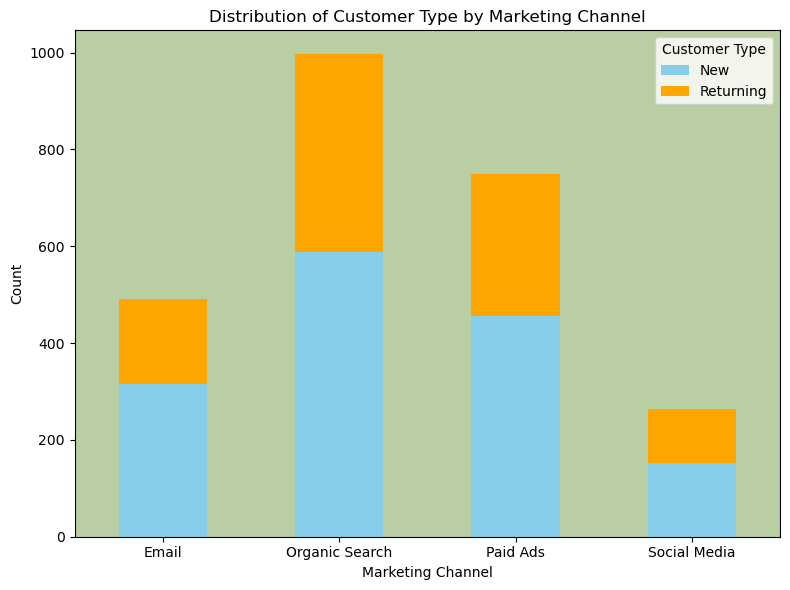

In [19]:
cross_tab = pd.crosstab(data['marketing_channel'], data['customer_type'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor("#abc491d2")  # light grey background
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)

plt.title('Distribution of Customer Type by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

In [39]:
# ----------------------------
# Insights Section
# ----------------------------

# 1. Overall metrics
total_visits = data["website_visit"].sum()
total_purchases = data["purchase"].sum()
overall_conversion_rate = (total_purchases / total_visits) * 100

print("\n--- INSIGHTS ---")
print(f"Total Website Visits: {total_visits}")
print(f"Total Purchases: {total_purchases}")
print(f"Overall Conversion Rate: {overall_conversion_rate:.2f}%")

# 2. Best marketing channel by purchases
purchases_by_channel = data.groupby("marketing_channel")["purchase"].sum()
best_channel = purchases_by_channel.idxmax()
print(f"Best Marketing Channel (by Purchases): {best_channel} with {purchases_by_channel.max()} purchases")

# 3. Best customer type by conversion rate
conversion_by_customer = data.groupby("customer_type").apply(
    lambda x: x["purchase"].sum() / x["website_visit"].sum()
)
best_customer_type = conversion_by_customer.idxmax()
print(f"Customer Type with Highest Conversion Rate: {best_customer_type} ({conversion_by_customer.max()*100:.2f}%)")

# 4. Best channel for Add to Cart → Purchase conversion
cart_to_purchase = data.groupby("marketing_channel")[["add_to_cart", "purchase"]].sum()
cart_to_purchase["conversion_rate"] = cart_to_purchase["purchase"] / cart_to_purchase["add_to_cart"]
best_cart_conversion_channel = cart_to_purchase["conversion_rate"].idxmax()
print(f"Channel with Best Cart → Purchase Conversion: {best_cart_conversion_channel} ({cart_to_purchase['conversion_rate'].max()*100:.2f}%)")

# 5. Average purchases per customer type
avg_purchase_per_customer = data.groupby("customer_type")["purchase"].mean()
print("\nAverage Purchases per Customer Type:")
print(avg_purchase_per_customer)



--- INSIGHTS ---
Total Website Visits: 2323
Total Purchases: 518
Overall Conversion Rate: 22.30%
Best Marketing Channel (by Purchases): Organic Search with 201 purchases
Customer Type with Highest Conversion Rate: New (22.81%)
Channel with Best Cart → Purchase Conversion: Email (40.41%)

Average Purchases per Customer Type:
customer_type
New          0.212021
Returning    0.199797
Name: purchase, dtype: float64


C:\Users\dines\AppData\Local\Temp\ipykernel_2704\3488889597.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

